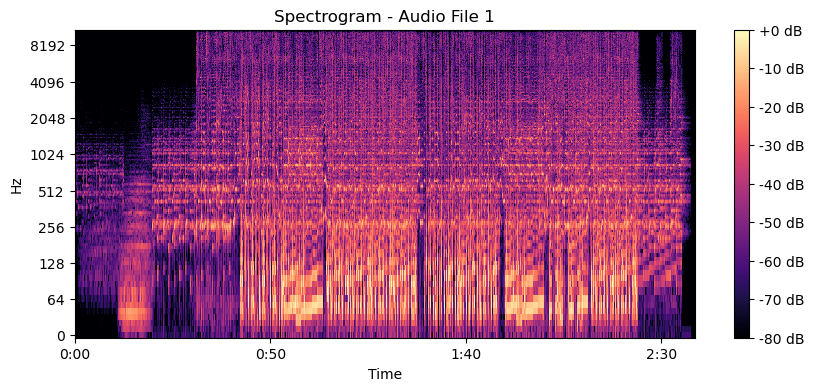

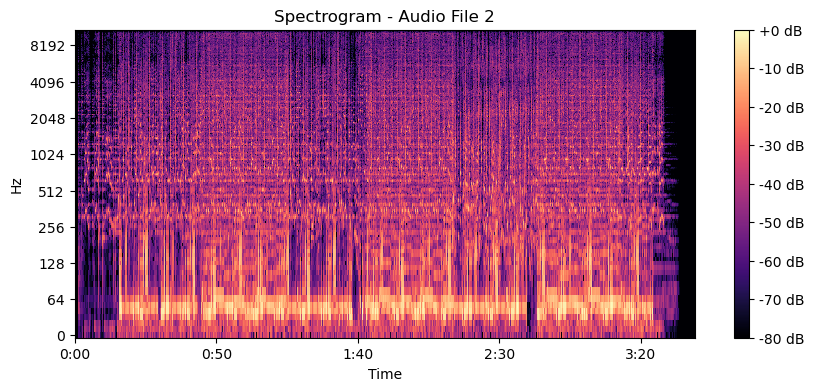

Tempo of Audio File 1: 172.265625
Tempo of Audio File 2: 129.19921875
Fundamental frequency (pitch) of Audio File 1: 12.023774
Fundamental frequency (pitch) of Audio File 2: 17.178366


In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_spectrogram(y, sr, title):
    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Define file paths
file1_path = "C:/Users/suwetha/Downloads/trial.wav"
file2_path = "C:/Users/suwetha/Downloads/trial2.wav"

# Check if files exist
if os.path.exists(file1_path) and os.path.exists(file2_path):
    # Load the audio files
    y1, sr1 = librosa.load(file1_path)
    y2, sr2 = librosa.load(file2_path)

    # Compute tempo
    tempo1, _ = librosa.beat.beat_track(y=y1, sr=sr1)
    tempo2, _ = librosa.beat.beat_track(y=y2, sr=sr2)

    # Compute fundamental frequency (pitch)
    f0_1, _ = librosa.piptrack(y=y1, sr=sr1)
    f0_2, _ = librosa.piptrack(y=y2, sr=sr2)

    # Plot spectrograms
    plot_spectrogram(y1, sr1, title='Spectrogram - Audio File 1')
    plot_spectrogram(y2, sr2, title='Spectrogram - Audio File 2')

    # Print tempo and frequency information
    print("Tempo of Audio File 1:", tempo1)
    print("Tempo of Audio File 2:", tempo2)
    print("Fundamental frequency (pitch) of Audio File 1:", np.mean(f0_1))
    print("Fundamental frequency (pitch) of Audio File 2:", np.mean(f0_2))
else:
    print("One or both audio files not found.")


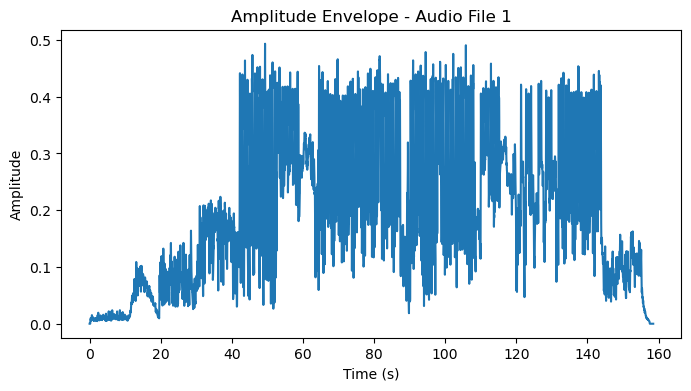

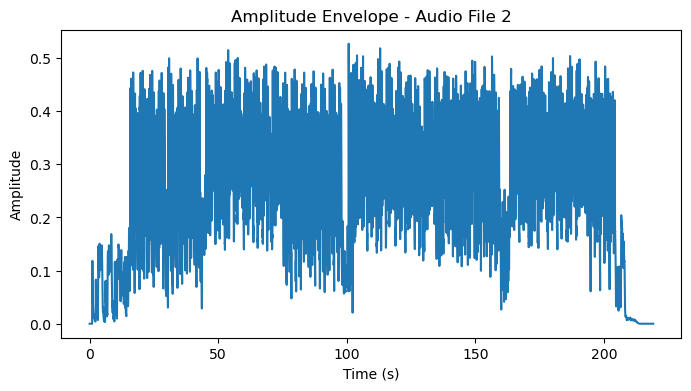

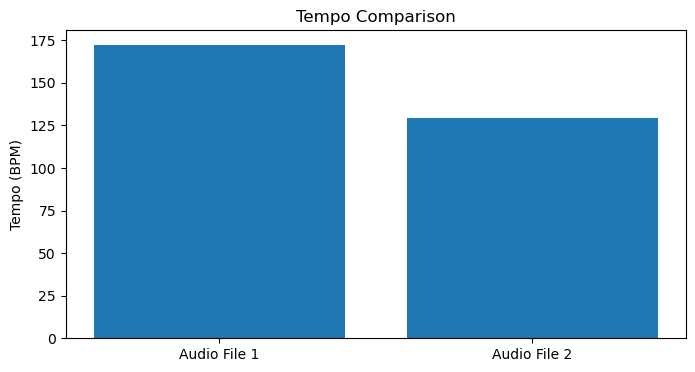

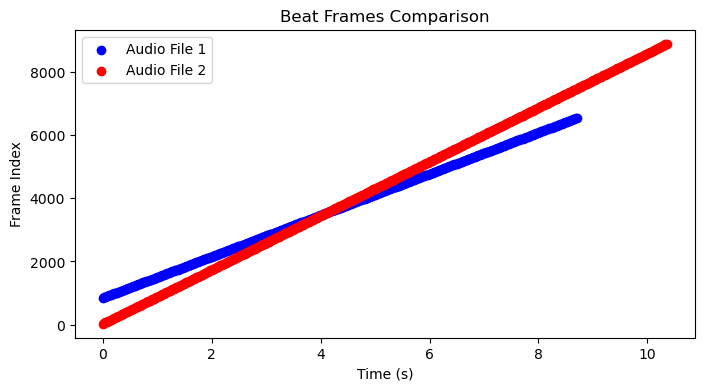

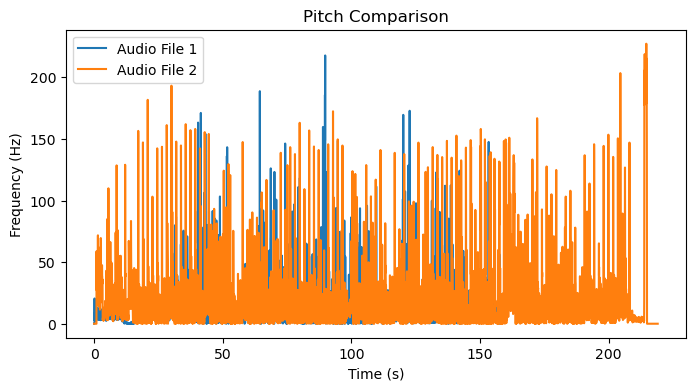

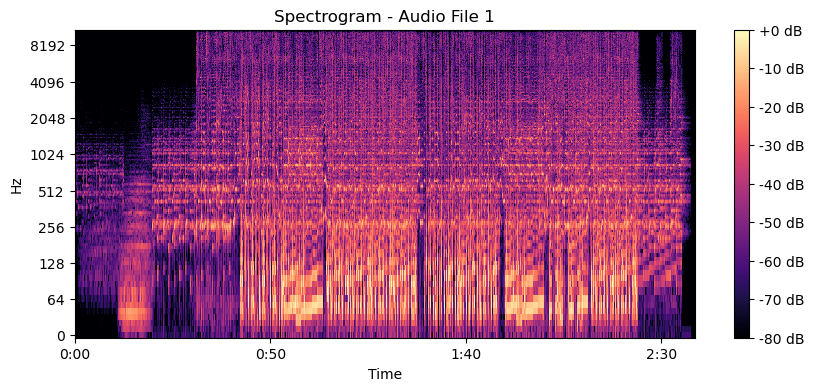

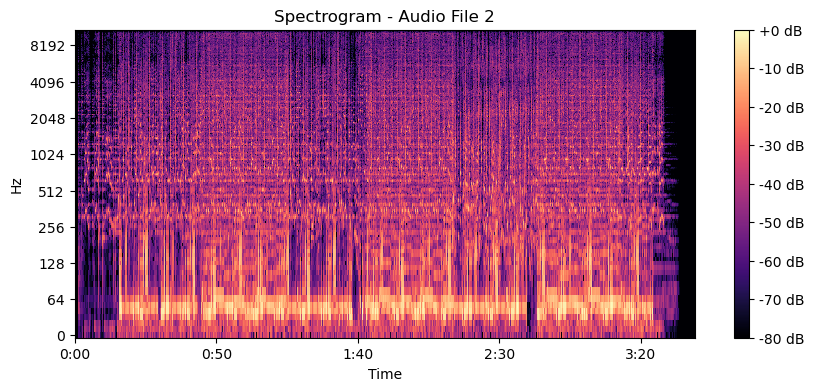

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_spectrogram(y, sr, title):
    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

def plot_amplitude(y, title):
    # Compute amplitude envelope
    amplitude_envelope = librosa.feature.rms(y=y)

    # Plot amplitude envelope
    plt.figure(figsize=(8, 4))
    plt.plot(librosa.times_like(amplitude_envelope), amplitude_envelope[0])
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def plot_tempo(tempo1, tempo2):
    # Plot tempo
    plt.figure(figsize=(8, 4))
    plt.bar(['Audio File 1', 'Audio File 2'], [tempo1, tempo2])
    plt.title('Tempo Comparison')
    plt.ylabel('Tempo (BPM)')
    plt.show()

def plot_beats(beat_frames1, beat_frames2, sr1, sr2):
    # Plot beat frames
    plt.figure(figsize=(8, 4))
    plt.scatter(librosa.times_like(beat_frames1, sr=sr1), beat_frames1, color='blue', label='Audio File 1')
    plt.scatter(librosa.times_like(beat_frames2, sr=sr2), beat_frames2, color='red', label='Audio File 2')
    plt.title('Beat Frames Comparison')
    plt.xlabel('Time (s)')
    plt.ylabel('Frame Index')
    plt.legend()
    plt.show()

def plot_pitch(pitch1, pitch2, sr1, sr2):
    # Plot pitch
    plt.figure(figsize=(8, 4))
    plt.plot(librosa.times_like(pitch1, sr=sr1), pitch1, label='Audio File 1')
    plt.plot(librosa.times_like(pitch2, sr=sr2), pitch2, label='Audio File 2')
    plt.title('Pitch Comparison')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()
    plt.show()

# Define file paths
file1_path = "C:/Users/suwetha/Downloads/trial.wav"
file2_path = "C:/Users/suwetha/Downloads/trial2.wav"

# Check if files exist
if os.path.exists(file1_path) and os.path.exists(file2_path):
    # Load the audio files
    y1, sr1 = librosa.load(file1_path)
    y2, sr2 = librosa.load(file2_path)

    # Compute amplitude envelope
    plot_amplitude(y1, title='Amplitude Envelope - Audio File 1')
    plot_amplitude(y2, title='Amplitude Envelope - Audio File 2')

    # Compute tempo
    tempo1, beat_frames1 = librosa.beat.beat_track(y=y1, sr=sr1)
    tempo2, beat_frames2 = librosa.beat.beat_track(y=y2, sr=sr2)

    # Plot tempo and beat frames
    plot_tempo(tempo1, tempo2)
    plot_beats(beat_frames1, beat_frames2, sr1, sr2)

    # Compute pitch
    pitch1, _ = librosa.piptrack(y=y1, sr=sr1)
    pitch2, _ = librosa.piptrack(y=y2, sr=sr2)

    # Plot pitch
    plot_pitch(np.mean(pitch1, axis=0), np.mean(pitch2, axis=0), sr1, sr2)

    # Plot spectrograms
    plot_spectrogram(y1, sr1, title='Spectrogram - Audio File 1')
    plot_spectrogram(y2, sr2, title='Spectrogram - Audio File 2')
else:
    print("One or both audio files not found.")
